In [116]:
import irondb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
df_original = irondb.sql_get('cookies','cookies_quality')

In [118]:
#df_original.to_csv('cookies.csv')

In [119]:
df_original.isnull().sum() #We can set id as index

id                       0
sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   0
crunch factor            0
aesthetic appeal         0
dtype: int64

In [120]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 17 columns):
id                      5198 non-null int64
sugar to flour ratio    5198 non-null float64
sugar index             5193 non-null float64
bake temp               5198 non-null int64
chill time              5198 non-null float64
calories                5198 non-null float64
density                 5198 non-null float64
pH                      5198 non-null float64
grams baking soda       5198 non-null float64
bake time               5188 non-null float64
quality                 5198 non-null int64
butter type             5198 non-null object
weight                  5198 non-null float64
diameter                5198 non-null int64
mixins                  5198 non-null object
crunch factor           5198 non-null object
aesthetic appeal        5198 non-null int64
dtypes: float64(9), int64(5), object(3)
memory usage: 690.4+ KB


# Some checks we did before data cleaning

In [222]:
df_original.groupby('aesthetic appeal')['quality'].mean()

aesthetic appeal
3    7.325120
4    7.333333
Name: quality, dtype: float64

In [ ]:
for i in list(df_original.select_dtypes(exclude=['object']).columns):
    sns.boxplot(df[i])
    plt.show()

In [163]:
df_original['butter type'].value_counts()

melted    3908
cubed     1275
Name: butter type, dtype: int64

In [164]:
df_original['aesthetic appeal'].value_counts() #This columns is not giving us so much information, so we are going to delete it

3    5180
4       3
Name: aesthetic appeal, dtype: int64

In [166]:
df_original['mixins'].value_counts()

chocolate                         1892
raisins                           1196
chocolate, oats                    745
nuts, chocolate                    519
nuts,raisins                       331
nuts, oats, chocolate              293
nuts, oats                         107
chocolate, peanut butter            52
raisins, oats                       24
peanut butter                       15
oats                                 4
chocolate, oats, peanut butter       2
                                     2
peanut butter, raisins               1
Name: mixins, dtype: int64

In [233]:
df_1 = df_original.copy()

# Data cleaning

In [234]:
def create_categories(df):
    flavours= ['raisins', 'nuts', 'chocolate', 'oats', 'peanut butter']
    for flavour in flavours:
        df[flavour] = 0
    for flavour in flavours:
        df[flavour] = np.where(df['mixins'].str.contains(flavour), 1, 0)

In [235]:
def clean_cookies(df):
    """
    We created this function to clean the data and have a better code.
    arg: Pandas Dataframe
    """
    df.set_index('id', inplace = True)
    df.dropna(inplace = True)
    df['crunch factor'] = pd.to_numeric(df['crunch factor'], errors = "coerce")
    create_categories(df)
    df.drop(columns = ['mixins', 'diameter', 'aesthetic appeal'], inplace = True)
    df.drop(index=df[df['sugar to flour ratio'] > 1.0].index, inplace=True)
    df.drop(index=df[df['calories'] < 1].index, inplace=True)
    df.drop(index=df[df['density'] > 1.5].index, inplace=True)
    df.drop(index=df[df['pH'] > 12].index, inplace=True)
    df.drop(index=df[df['quality'] > 10].index, inplace=True)
    df['bake temp'] = df['bake temp'].apply(lambda x: 640 if x > 640 else x)
    df.drop(index=df[df['weight'] < 1].index, inplace=True)
    return df

In [236]:
df_clean = clean_cookies(df_1)

In [237]:
df_clean.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,crunch factor,raisins,nuts,chocolate,oats,peanut butter
id,,,,,,,,,,,,,,,,,,
1,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,1.30,1,0,0,0,0
2,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,1.71,1,0,0,0,0
3,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,1.78,0,1,1,0,0
4,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,1.59,0,0,1,0,0
5,0.24,2.4,640,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,1.30,0,1,1,1,0


In [238]:
df_clean.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,crunch factor,raisins,nuts,chocolate,oats,peanut butter
count,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000,5165.000000
mean,0.317127,5.400561,479.624395,30.360891,115.187706,0.994667,8.218813,0.531169,10.494367,7.320232,14.407648,1.499185,0.299710,0.241433,0.675508,0.226912,0.013553
std,0.143581,4.670116,126.214373,17.260294,56.090207,0.002933,0.161660,0.151081,1.193130,1.298746,2.586865,0.289238,0.458175,0.427993,0.468230,0.418876,0.115636
min,0.000000,0.600000,90.000000,0.000000,6.000000,0.987110,7.720000,0.220000,8.000000,3.000000,7.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240000,1.800000,380.000000,17.000000,77.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,1.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,1.500000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996900,8.320000,0.600000,11.300000,8.000000,15.400000,1.750000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,31.600000,640.000000,146.500000,366.500000,1.010300,9.010000,2.000000,14.900000,10.000000,31.800000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


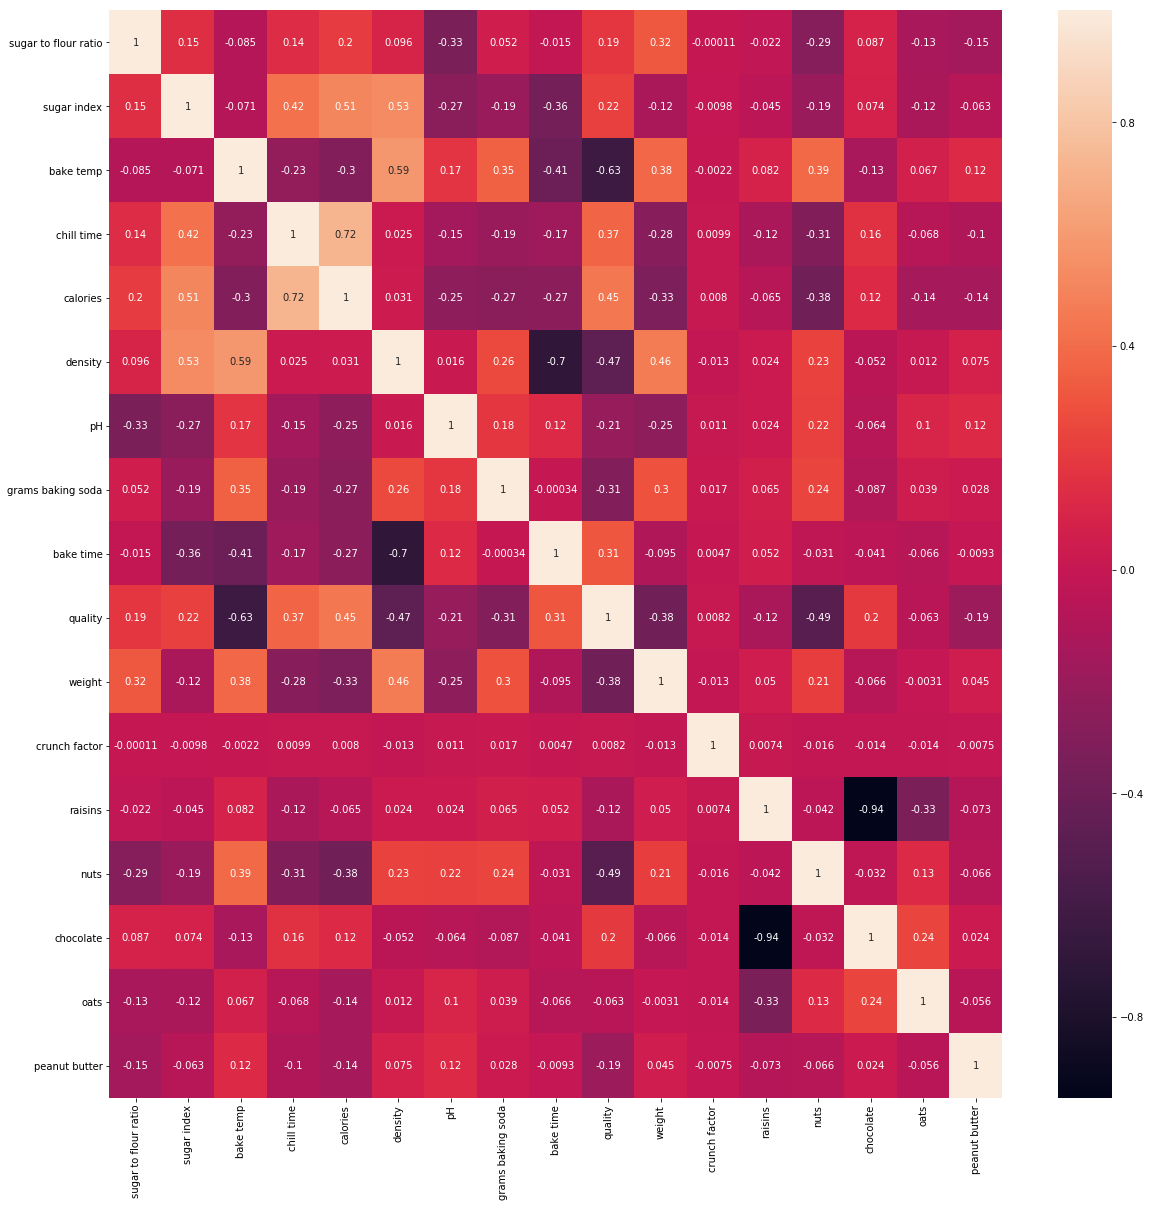

In [240]:
plt.figure(figsize = (20,20))
sns.heatmap(df_clean.corr(), annot = True)